# K-means Clustering

In [321]:
!pip install numpy pandas seaborn pillow

In [331]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
sns.set()

In [337]:
image_path = 'HW2_data/1/hw2-image.txt'
image = pd.read_csv(image_path, sep=' ', header=None).to_numpy()
image

array([[129, 108,  61],
       [117,  96,  51],
       [102,  77,  36],
       ...,
       [ 81,  36,   7],
       [ 71,  31,   6],
       [ 66,  31,  11]], dtype=int64)

In [71]:
CENTROIDS = np.array([[255, 255, 255],
                      [255, 0, 0],
                      [128, 0, 0],
                      [0, 255, 0],
                      [0, 128, 0],
                      [0, 0, 255],
                      [0, 0, 128],
                      [0, 0, 0]])

In [334]:
def get_cluster_indices(vectors, centroids):
    distances = np.sqrt(((vectors - centroids[:, None]) ** 2).sum(axis=2))
    return np.argmin(distances, axis=0)

def get_clusters(vectors, centroids):
    cluster_indices = get_cluster_indices(vectors, centroids)
    return [vectors[cluster_indices == i] for i in range(len(centroids))]

def plot_progress(errors):
    errors = pd.DataFrame(errors, columns=['Squared Distance'])
    errors['Iteration'] = np.arange(len(errors))
    ax = sns.lineplot(x='Iteration', y='Squared Distance', data=errors)
    print("Squared-distance error over each iteration:")
    plt.show()
    
def show_clustered_image(cluster_indices, centroids, img_shape=(516, 407, 3)):
    image = centroids[cluster_indices].astype(np.uint8)
    image = Image.fromarray(image.reshape(img_shape))
    print("Quantized image:")
    display(image)

def kmeans(vectors, k, centroids):
    assert len(centroids) == k
    filler = np.full(centroids.shape[1:], np.inf)
    print(f"Running K-means with {k} initial centroids until convergence...")
    
    errors = []
    for i in itertools.count():
        # Assign each point to the nearest centroid
        clusters = get_clusters(vectors, centroids)
        # Calculate and store squared-distance error
        errors.append(sum([((cluster - centroid) ** 2).sum() for cluster, centroid in zip(clusters, centroids)]))
        # Find new centroids
        new_centroids = np.array([c.mean(axis=0) if c.any() else filler for c in clusters])
        # Print summary and stop after convergence
        if np.allclose(centroids, new_centroids):
            print(f"K-means converged after {i + 1} iterations!")
            plot_progress(errors)
            centroids = centroids[np.isfinite(centroids).any(axis=1)]
            clusters = get_clusters(vectors, centroids)
            cluster_indices = get_cluster_indices(vectors, centroids)
            show_clustered_image(cluster_indices, centroids)
            return centroids, clusters, cluster_indices
        centroids = new_centroids

Running K-means with 8 initial centroids until convergence...
K-means converged after 48 iterations!
Squared-distance error over each iteration:


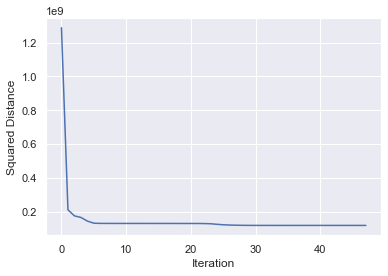

Quantized image:


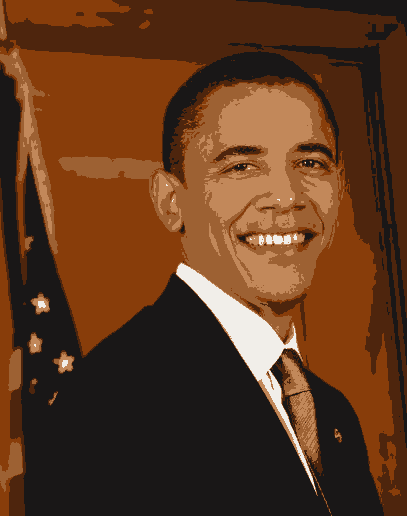

In [335]:
centroids, clusters, cluster_indices = kmeans(image, 8, CENTROIDS)

In [336]:
print(f"There are {len(centroids)} valid centroids:")
for i, (centroid, cluster) in enumerate(zip(centroids, clusters)):
    print(f"Centroid {i + 1} - {centroid} | {len(clusters[i])} pixels")

There are 6 valid centroids:
Centroid 1 - [241.2296146  238.62515213 233.86288032] | 4930 pixels
Centroid 2 - [194.41158657 136.33311389  90.94364714] | 15190 pixels
Centroid 3 - [136.2655563   61.08973066  10.10385457] | 52535 pixels
Centroid 4 - [157.29173273  97.59397508  51.43329558] | 22075 pixels
Centroid 5 - [78.92743714 37.10828688 13.07070482] | 40365 pixels
Centroid 6 - [25.97800232 23.23575423 23.60599063] | 74917 pixels
